importing dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn import metrics


Data Collection & Processing

In [ ]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')

In [ ]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [ ]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# checking for missing values
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


Data Analysis

In [ ]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

Univariate Analysis (Distributions)

Visualization 1 – Gender Count

Text(0.5, 1.0, 'Gender Distribution')

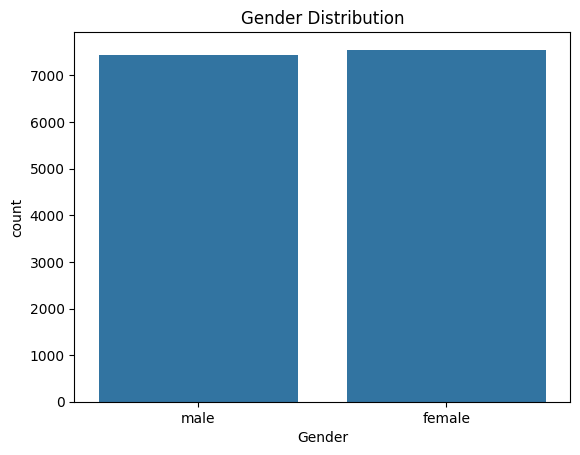

In [ ]:
sns.countplot(x="Gender", data=calories_data)
plt.title("Gender Distribution")


Visualization 2 – Age Distribution

Text(0.5, 1.0, 'Age Distribution')

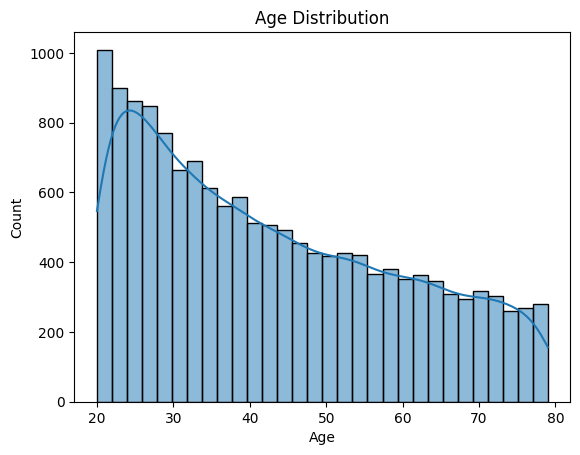

In [ ]:
sns.histplot(calories_data["Age"], kde=True, bins=30)
plt.title("Age Distribution")


Visualization 3 – Height Distribution

Text(0.5, 1.0, 'Height Distribution')

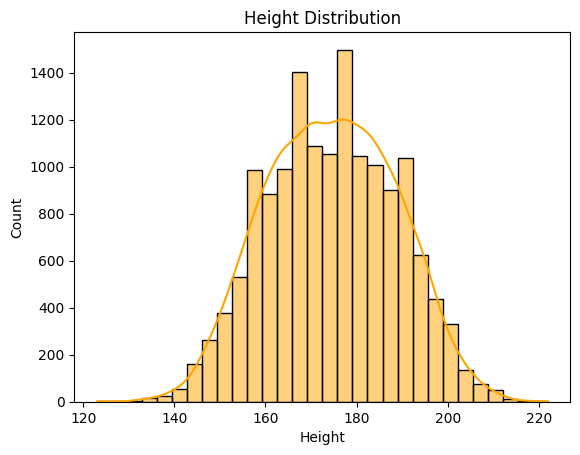

In [ ]:
sns.histplot(calories_data["Height"], kde=True, bins=30, color="orange")
plt.title("Height Distribution")


Visualization 4 – Weight Distribution

Text(0.5, 1.0, 'Weight Distribution')

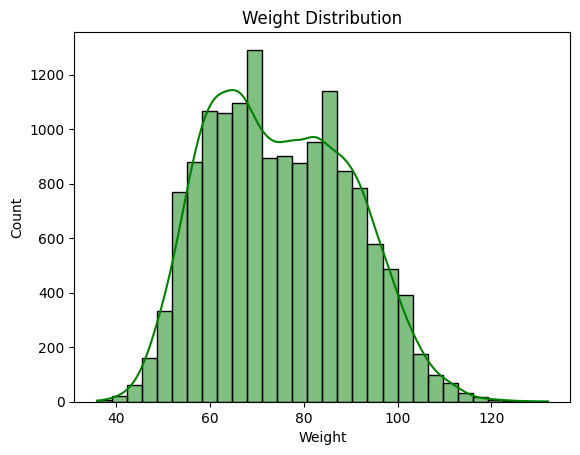

In [ ]:
sns.histplot(calories_data["Weight"], kde=True, bins=30, color="green")
plt.title("Weight Distribution")


Visualization 5 – Duration Distribution

Text(0.5, 1.0, 'Duration Distribution')

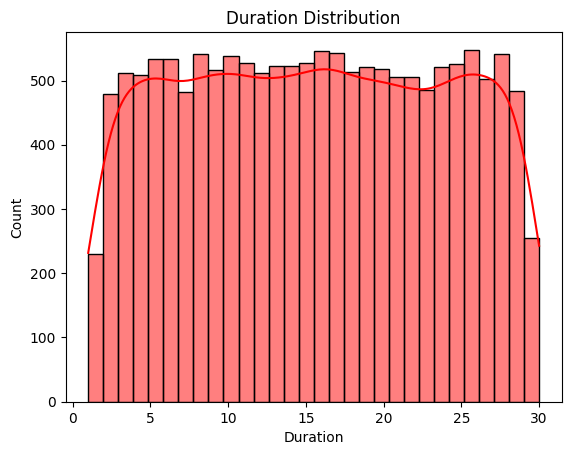

In [ ]:
sns.histplot(calories_data["Duration"], kde=True, bins=30, color="red")
plt.title("Duration Distribution")


Visualization 6 – Heart Rate Distribution

Text(0.5, 1.0, 'Heart Rate Distribution')

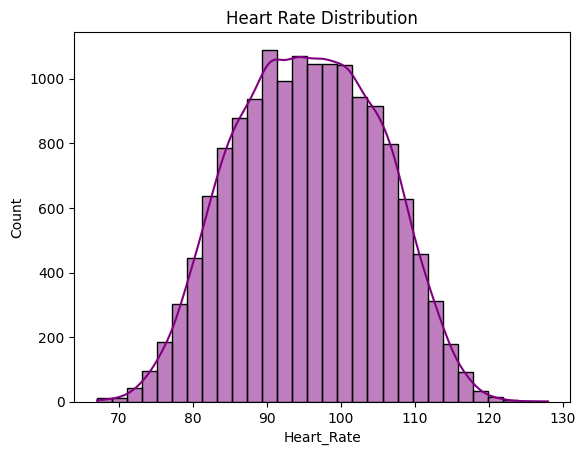

In [ ]:
sns.histplot(calories_data["Heart_Rate"], kde=True, bins=30, color="purple")
plt.title("Heart Rate Distribution")


Visualization 7 – Body Temperature Distribution

Text(0.5, 1.0, 'Body Temperature Distribution')

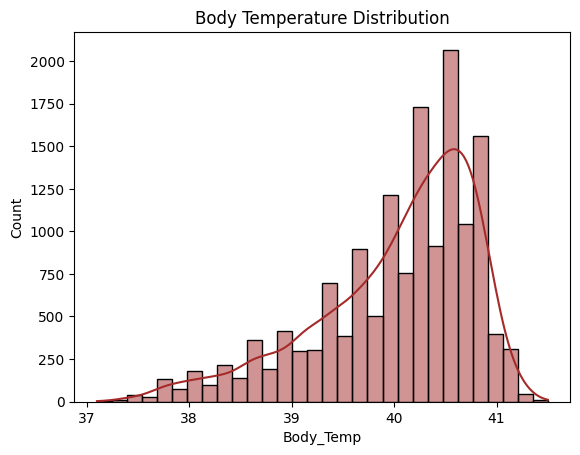

In [ ]:
sns.histplot(calories_data["Body_Temp"], kde=True, bins=30, color="brown")
plt.title("Body Temperature Distribution")


Visualization 8 – Calories Distribution

Text(0.5, 1.0, 'Calories Burnt Distribution')

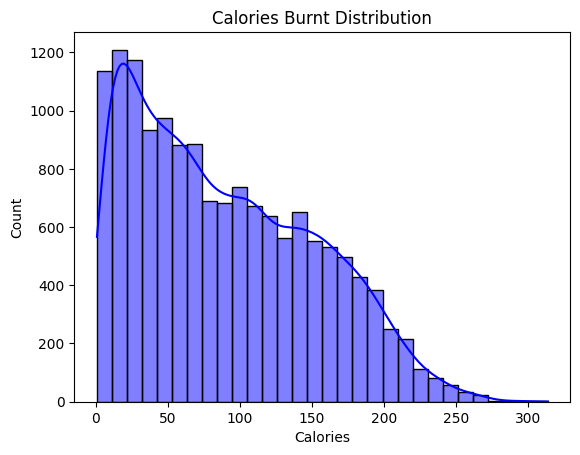

In [ ]:
sns.histplot(calories_data["Calories"], kde=True, bins=30, color="blue")
plt.title("Calories Burnt Distribution")


4. Bivariate Analysis
 – Calories by Gender

Text(0.5, 1.0, 'Calories Burnt by Gender')

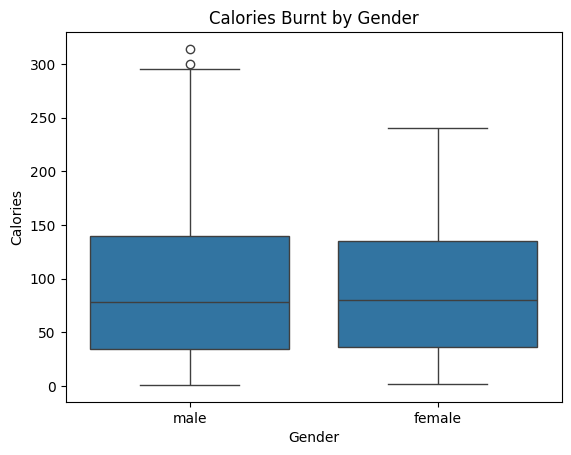

In [ ]:
sns.boxplot(x="Gender", y="Calories", data=calories_data)
plt.title("Calories Burnt by Gender")


Heart Rate by Gender

Text(0.5, 1.0, 'Heart Rate by Gender')

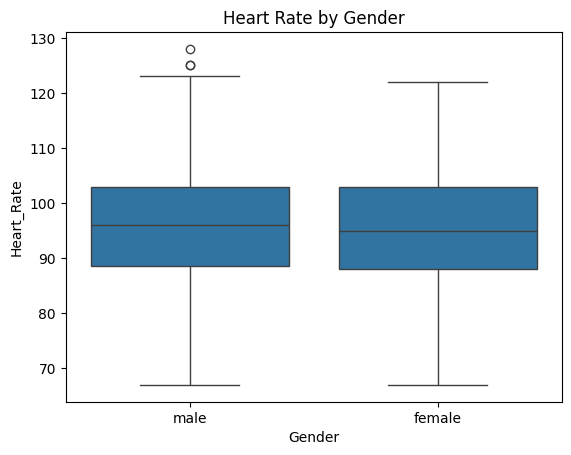

In [ ]:
sns.boxplot(x="Gender", y="Heart_Rate", data=calories_data)
plt.title("Heart Rate by Gender")


Calories vs Duration

Text(0.5, 1.0, 'Calories vs Duration')

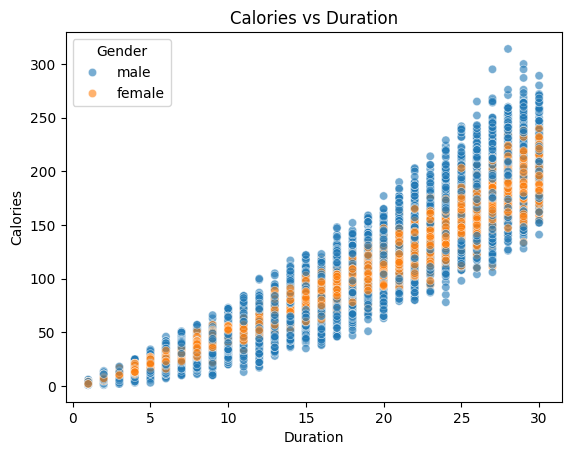

In [ ]:
sns.scatterplot(x="Duration", y="Calories", hue="Gender", data=calories_data, alpha=0.6)
plt.title("Calories vs Duration")


Calories vs Weight

Text(0.5, 1.0, 'Calories vs Weight')

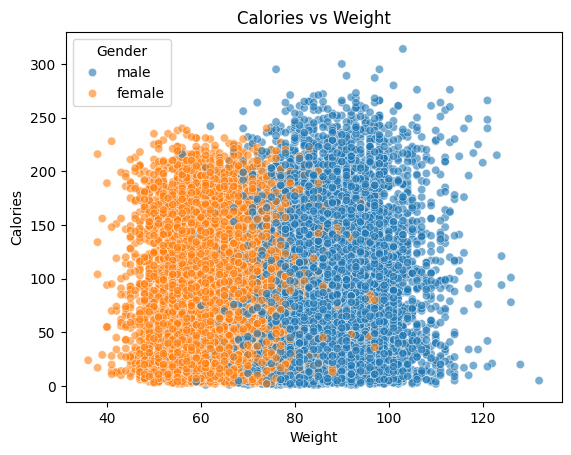

In [ ]:
sns.scatterplot(x="Weight", y="Calories", hue="Gender", data=calories_data, alpha=0.6)
plt.title("Calories vs Weight")


Calories vs Heart Rate

Text(0.5, 1.0, 'Calories vs Heart Rate')

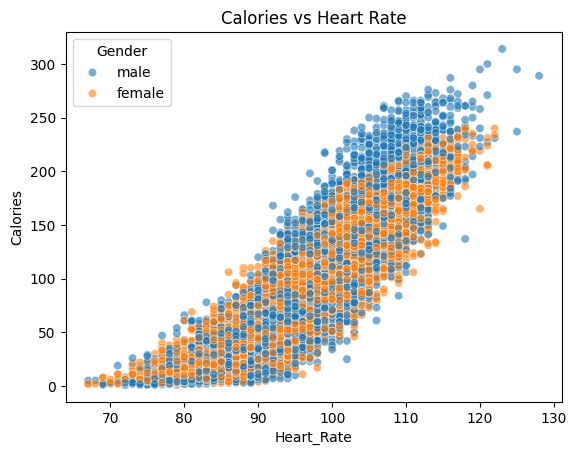

In [ ]:
sns.scatterplot(x="Heart_Rate", y="Calories", hue="Gender", data=calories_data, alpha=0.6)
plt.title("Calories vs Heart Rate")


Calories vs Age

Text(0.5, 1.0, 'Calories vs Age')

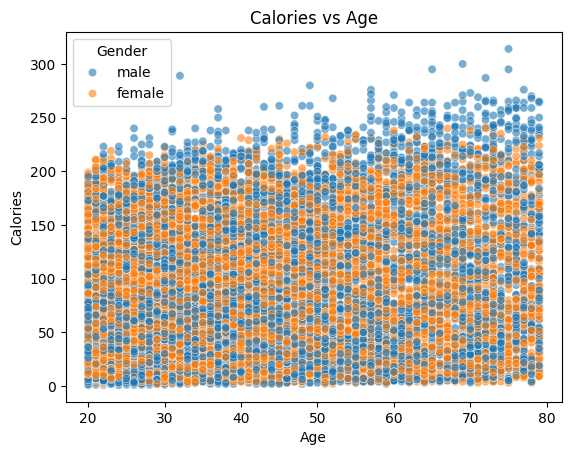

In [ ]:
sns.scatterplot(x="Age", y="Calories", hue="Gender", data=calories_data, alpha=0.6)
plt.title("Calories vs Age")


Calories vs Body Temp

Text(0.5, 1.0, 'Calories vs Body Temperature')

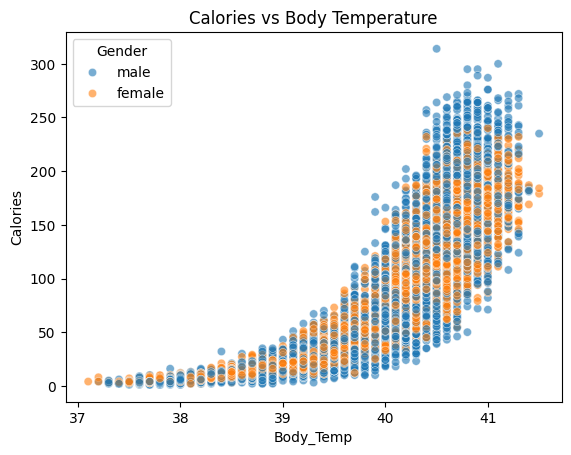

In [ ]:
sns.scatterplot(x="Body_Temp", y="Calories", hue="Gender", data=calories_data, alpha=0.6)
plt.title("Calories vs Body Temperature")


Multivariate Analysis

Correlation Matrix

Text(0.5, 1.0, 'Correlation Heatmap')

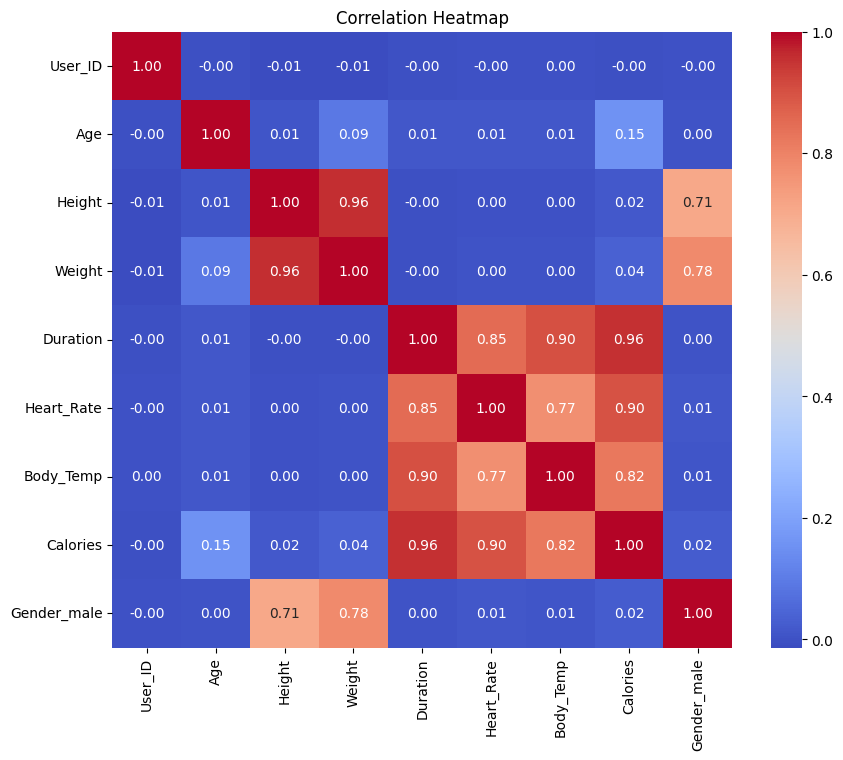

In [ ]:
plt.figure(figsize=(10,8))
# Convert the 'Gender' column to numerical using one-hot encoding
calories_data_encoded = pd.get_dummies(calories_data, columns=['Gender'], drop_first=True)
sns.heatmap(calories_data_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

Pairplot

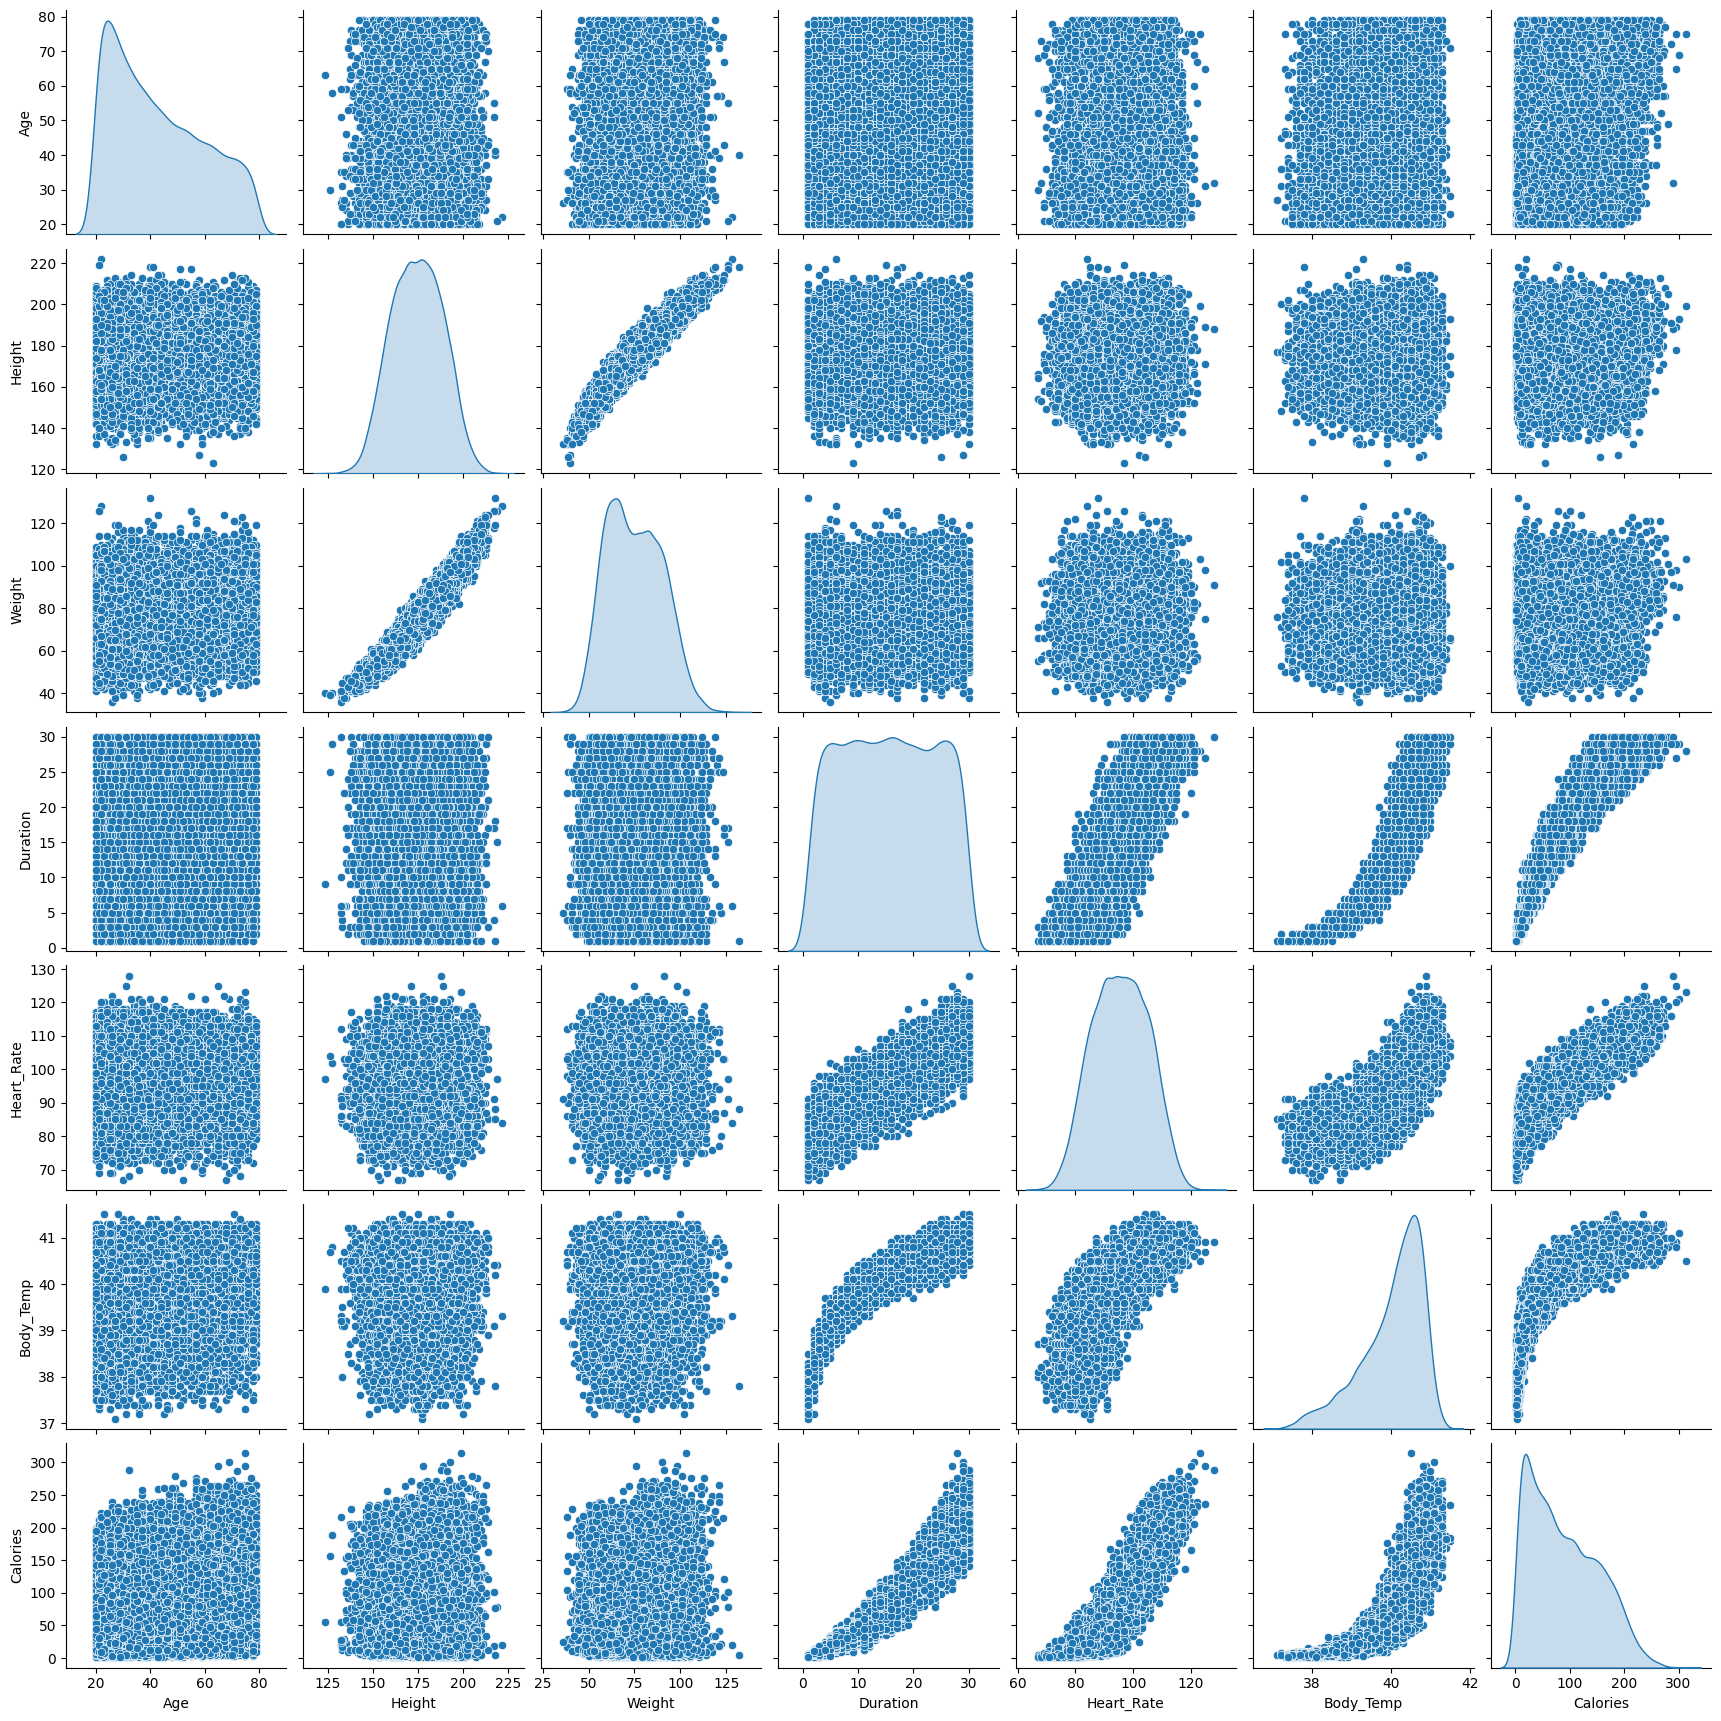

In [ ]:
sns.pairplot(calories_data.drop(columns=["User_ID"]), diag_kind="kde")


Calories by Age & Gender

Text(0.5, 1.0, 'Calories Distribution by Gender')

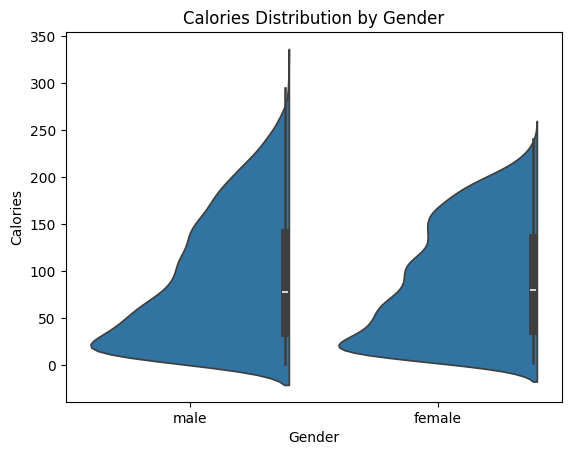

In [ ]:
sns.violinplot(x="Gender", y="Calories", data=calories_data, split=True)
plt.title("Calories Distribution by Gender")


Converting the text data to numerical values

In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

/tmp/ipython-input-2713499166.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [ ]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

In [ ]:

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=2),
    "Random Forest": RandomForestRegressor(random_state=2, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=2),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=2)
}




In [ ]:
# Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(Y_test, y_pred)
    mse = metrics.mean_squared_error(Y_test, y_pred)
    r2 = metrics.r2_score(Y_test, y_pred)

    results.append([name, mae, mse, r2])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "R2 Score"])

# Sort by R2 Score (higher is better)
results_df = results_df.sort_values(by="R2 Score", ascending=False)
results_df.reset_index(drop=True, inplace=True)

results_df

,Model,MAE,MSE,R2 Score
0,XGBoost,1.483368,4.710710,0.998801
1,Random Forest,1.685180,6.954201,0.998229
2,Gradient Boosting,2.778304,14.568995,0.996291
3,Decision Tree,3.421333,28.519333,0.992739
4,KNN Regressor,5.050200,51.460813,0.986898
5,Linear Regression,8.385188,130.087074,0.966879
6,Support Vector Regressor,10.620614,243.293102,0.938056


/tmp/ipython-input-3682520154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2 Score", y="Model", data=results_df, palette="viridis")


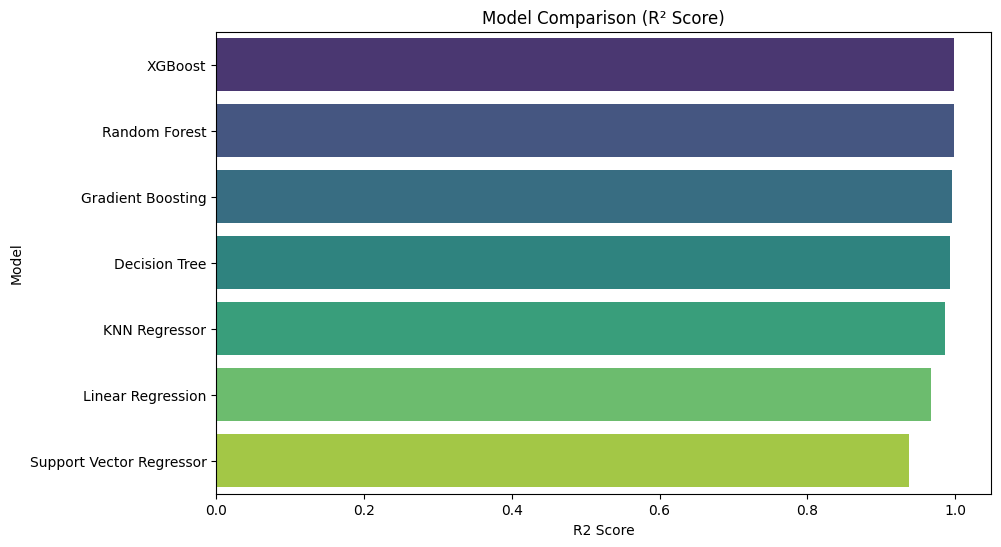

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="R2 Score", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison (R² Score)")
plt.show()


hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# ================================
# 1. Random Forest Hyperparameter Tuning
# ================================
rf = RandomForestRegressor(random_state=2)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params,
                       scoring='r2', cv=3, n_jobs=-1, verbose=2)

rf_grid.fit(X_train, Y_train)

print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best R2 Score for Random Forest:", rf_grid.best_score_)

best_rf = rf_grid.best_estimator_

# Evaluate on test data
rf_pred = best_rf.predict(X_test)
print("Random Forest (Tuned) R2:", metrics.r2_score(Y_test, rf_pred))
print("Random Forest (Tuned) MAE:", metrics.mean_absolute_error(Y_test, rf_pred))

# ================================
# 2. XGBoost Hyperparameter Tuning
# ================================
xgb = XGBRegressor(objective="reg:squarederror", random_state=2)

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_params,
                        scoring='r2', cv=3, n_jobs=-1, verbose=2)

xgb_grid.fit(X_train, Y_train)

print("Best Parameters for XGBoost:", xgb_grid.best_params_)
print("Best R2 Score for XGBoost:", xgb_grid.best_score_)

best_xgb = xgb_grid.best_estimator_

# Evaluate on test data
xgb_pred = best_xgb.predict(X_test)
print("XGBoost (Tuned) R2:", metrics.r2_score(Y_test, xgb_pred))
print("XGBoost (Tuned) MAE:", metrics.mean_absolute_error(Y_test, xgb_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R2 Score for Random Forest: 0.9973549508610375
Random Forest (Tuned) R2: 0.9982599403303746
Random Forest (Tuned) MAE: 1.6561966666666668
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best R2 Score for XGBoost: 0.9993338143657878
XGBoost (Tuned) R2: 0.9995311703710198
XGBoost (Tuned) MAE: 0.9725061205625534


save model

In [ ]:
import pickle

# ✅ Save the best model (assuming best_xgb after tuning)
with open("calories_best_model.pkl", "wb") as file:
    pickle.dump(best_xgb, file)

print("✅ Model saved successfully as calories_best_model.pkl")

# ================================
# 📌 Load the model when needed
# ================================
with open("calories_best_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Example Prediction with loaded model
sample_input = X_test.iloc[0:1]   # take first row from test set
prediction = loaded_model.predict(sample_input)

print("Sample Input:\n", sample_input)
print("Predicted Calories Burnt:", prediction[0])
print("Actual Calories Burnt:", Y_test.iloc[0])


✅ Model saved successfully as calories_best_model.pkl
Sample Input:
       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
7592       1   41   172.0    74.0      24.0        98.0       40.8
Predicted Calories Burnt: 129.54442
Actual Calories Burnt: 127.0
